# 타이타닉 생존자 예측

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [96]:
os.getcwd()

'C:\\Users\\admin'

In [184]:
titanic= pd.read_csv('./data/titanic_data/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


------------------

> 잠깐 설명 타임

- ./ 는 내 현재 워킹 디렉토리 위치를 의미
- Sibsp : 같이 탑승한 형제,자매 또는 배우자 인원 수
- parch : 같이 탑승한 부모님 또는 어린이 인원 수
- cabin : 선실 번호
- pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- embarked : 중간 정착 항구

---------------

## 데이터 정보 확인

In [185]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


----------------

## 결측치 채우기

사이킷런 머시러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 함<br>
fillna() 함수를 사용하여 간단하게 Null 값을 평균 또는 고정 값으로 변경한 뒤 Null 값이 없는지 다시 확인해보자.

>  titanic 내 Age 결측치를 평균으로 대체

In [186]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

\# titanic.isnull().sum()도 가능

In [187]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [173]:
titanic['Cabin'].fillna('N', inplace = True)

In [188]:
titanic['Embarked'].fillna('N', inplace = True)

In [189]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

> 번외) Cabin의 경우 선실 번호중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다. 하여 Carbin 속성의 경우 앞 문자만 추출해보자.

In [190]:
titanic['Cabin'] = titanic['Cabin'].str[:1]

In [191]:
titanic['Cabin'].head(3)

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object

-------------------

## 데이터 탐색

### 성별에 따른 생존자 수 비교

In [105]:
titanic.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [106]:
titanic.groupby(['Sex', 'Survived'])[['Survived']].agg('count')

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

--------------

### 시각화

> 성별에 따른 생존자 수 비교 : 막대그래프

In [107]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

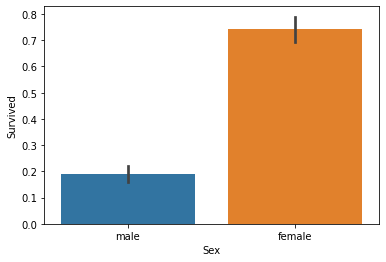

In [108]:
sns.barplot(data = titanic, x = titanic['Sex'], y = titanic['Survived'])

> 객실 등급별 성별에 따른 생존 확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

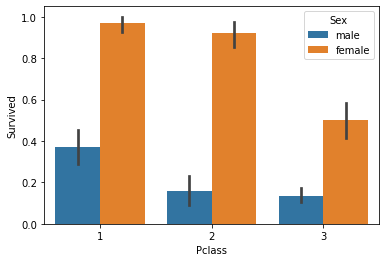

In [109]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex')

------------

> age에 따른 생존 확률

In [193]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

In [194]:
plt.figure(figsize = (10,6)) # 막대그래프의 크기 figure을 더 크게 설정

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [195]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'] # X축의 값을 순차적으로 표시하기 위한 설정

In [204]:
titanic['Age_cat'] = titanic['Age'].apply(lambda x : get_category(x))

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

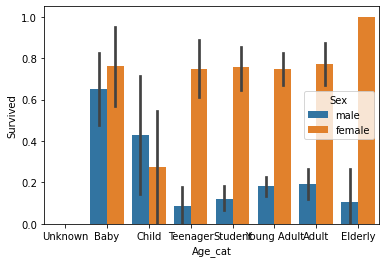

In [197]:
sns.barplot(data = titanic, x = 'Age_cat', y = 'Survived', hue = 'Sex', order = group_names)

In [209]:
# titanic.drop('Age_cat', axis = 1, inplace = True)

-------------------

## 인코딩

> 레이블 인코딩 적용 : 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

### 강사님 코드

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
encoder = LabelEncoder()

In [113]:
encoder.fit_transform(titanic['Cabin'])

array([8, 2, 8, 2, 8, 8, 4, 8, 8, 8, 6, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3,
       8, 0, 8, 8, 8, 2, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 1, 2, 8, 8, 8, 8, 8, 1, 2, 8, 8, 8,
       5, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       2, 8, 8, 8, 4, 8, 8, 8, 0, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8,
       2, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 4, 3, 8, 8, 8, 5, 8, 8, 8,
       8, 8, 8, 8, 3, 2, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 2, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 1, 8, 8, 8, 0, 8,
       8, 2, 8, 8, 8, 8, 8, 5, 8, 0, 8, 8, 8, 8, 8, 8, 8, 5, 1, 1, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 0, 8, 8, 8, 8, 8, 3, 8, 8, 3, 8,
       8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 2, 8, 8, 3, 8, 8, 6, 2, 8, 8, 8, 8, 1, 8, 8, 8, 8, 4, 1,
       8, 8, 8, 8, 2, 2, 8, 8, 8, 2, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8,
       8, 8, 8, 8, 8, 1, 3, 8, 8, 8, 8, 2, 2, 1, 8,

In [114]:
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin'])

In [115]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,8,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,4,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,8,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,8,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,8,C


In [116]:
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin'])
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])

In [117]:
titanic[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2


### 책 코드(함수 생성)

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

In [214]:
titanic = encode_features(titanic)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,8,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,8,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,8,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,8,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


-------------

## 불필요한 피처 삭제하기

PassengerId, Name, Ticket

In [118]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,8,2
887,1,1,0,19.0,0,0,30.0000,1,2
888,0,3,0,29.7,1,2,23.4500,8,2
889,1,1,1,26.0,0,0,30.0000,2,0


---------------

## 머신러닝

> ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측해보자.<br>

- 로지스틱 회귀 : 이름은 회귀지만 매우 강력한 분류 알고리즘
- LogisticRegression의 생성 인자로 입력된 solver = 'liblinea'는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것임

### 강사님 코드

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# 데이터 형태를 생각하면서 바인딩해주자. 현재 X,y 모두 데이터프레임

features = X = titanic.iloc[:, 1:]
labels = y = titanic.iloc[:, :1]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = 11)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [124]:
# 학습/예측/평가

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
np.round(accuracy_score(y_test, dt_pred), 4)

0.7933

In [125]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
np.round(accuracy_score(y_test, rf_pred), 4)

C:\Users\admin\AppData\Local\Temp\ipykernel_6224\2317944249.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.8547

In [126]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred).round(4)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8603

------------------

## 교차검증

In [127]:
# 강사님 코드

In [128]:
from sklearn.model_selection import KFold

In [129]:
kfold = KFold(n_splits = 5) # 5개의 폴드 세트 객체 생성

In [130]:
scores = [] # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성

In [138]:
for train_index, test_index in kfold.split(titanic):
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
    dt_clf.fit(X_train, y_train)
    predictions = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    
scores

[0.7430167597765364,
 0.7808988764044944,
 0.797752808988764,
 0.7808988764044944,
 0.8258426966292135,
 0.7374301675977654,
 0.7696629213483146,
 0.7865168539325843,
 0.7752808988764045,
 0.8033707865168539]

In [134]:
features.loc[test_index, :]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
713,3,1,29.0,0,0,9.4833,8,2
714,2,1,52.0,0,0,13.0000,8,2
715,3,1,19.0,0,0,7.6500,5,2
716,1,0,38.0,0,0,227.5250,2,0
717,2,0,27.0,0,0,10.5000,4,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,8,2
887,1,0,19.0,0,0,30.0000,1,2
888,3,0,29.7,1,2,23.4500,8,2
889,1,1,26.0,0,0,30.0000,2,0


In [135]:
features.values[train_index]

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  8.    ,  2.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  2.    ,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  8.    ,  2.    ],
       ...,
       [ 1.    ,  0.    , 24.    , ..., 49.5042,  2.    ,  0.    ],
       [ 1.    ,  1.    , 29.7   , ..., 26.55  ,  2.    ,  2.    ],
       [ 1.    ,  1.    , 48.    , ..., 52.    ,  2.    ,  2.    ]])

In [ ]:
X_train, X_test = features.values[train_index], features.values[test_index]
y_train, y_test = labels.values[train_index], labels.values[test_index]

In [145]:
np.mean(scores).round(4) # 평균 정확도 계산

0.7801

In [147]:
accuracy # 개별 정확도 계산

0.8033707865168539

In [152]:
# n 번째 교차검증 정확도 출력

In [150]:
kfold = KFold(n_splits = 5)
scores = []
count = 0

for train_index, test_index in kfold.split(titanic):
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
    count += 1
    
    dt_clf.fit(X_train, y_train)
    predictions = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f'{count}번째 정확도:', accuracy)
    
print()
print('평균 정확도:', np.mean(scores).round(4))

1번째 정확도: 0.7318435754189944
2번째 정확도: 0.7640449438202247
3번째 정확도: 0.7865168539325843
4번째 정확도: 0.7640449438202247
5번째 정확도: 0.8202247191011236

평균 정확도: 0.7733


In [154]:
features.take(test_index) # 열의 빠른 추출

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
713,3,1,29.0,0,0,9.4833,8,2
714,2,1,52.0,0,0,13.0000,8,2
715,3,1,19.0,0,0,7.6500,5,2
716,1,0,38.0,0,0,227.5250,2,0
717,2,0,27.0,0,0,10.5000,4,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,8,2
887,1,0,19.0,0,0,30.0000,1,2
888,3,0,29.7,1,2,23.4500,8,2
889,1,1,26.0,0,0,30.0000,2,0


----------------

### cross_val_score()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_clf, features, labels, cv = 5).round(4)

array([0.7654, 0.7697, 0.8034, 0.7809, 0.8258])

------------------

### GridSearchCV

: DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 줌

In [240]:
# cv는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]
             }

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_) # 최적 하이퍼 파라미터
print(grid_dclf.best_score_) # 최고 정확도
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test) # 최적 하이퍼 파라미터로 학습된 estimator로 예측 및 평가 수행

acc = accuracy_score(y_test, dpredictions)
acc # 테스트 세트에서의 DecisionTreeClassifier 정확도

{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.812075248694967


0.8651685393258427

> 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 함

-------------------